# Modeling
In this section, we train and evaluate regression models to predict the SalePrice of homes using the features we selected and preprocessed in the previous notebook.

The model will use the following features:
- `TotalSF` – Total home area (square feet)
- `Overall Qual` – Overall material and finish quality
- `Garage Cars` – Garage capacity (number of cars)
- `HouseAge` – Year of original construction

The target variable is:
- `SalePrice` – Final selling price of the property

## Load Data

In [22]:
import joblib

# Load split and scaled data
X_train = joblib.load("../data/X_train_scaled.pkl")
X_test = joblib.load("../data/X_test_scaled.pkl")
y_train = joblib.load("../data/y_train.pkl")
y_test = joblib.load("../data/y_test.pkl")

## Linear Regression

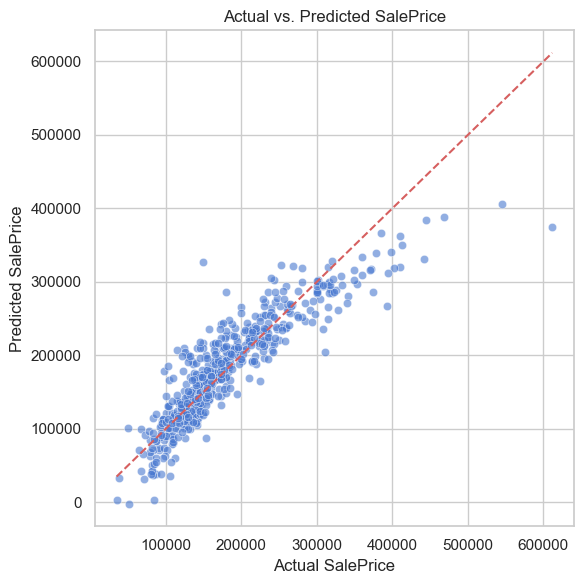

Train RMSE: 33966.08, MAE: 24027.07, R²: 0.8205
Test  RMSE: 33926.91, MAE: 24304.41, R²: 0.8013


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

# Initialize and fit model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on train and test
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Metrics
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Plot linear regression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette="muted", context="notebook")

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs. Predicted SalePrice")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.tight_layout()
plt.show()

# Output
print(f"Train RMSE: {train_rmse:.2f}, MAE: {train_mae:.2f}, R²: {train_r2:.4f}")
print(f"Test  RMSE: {test_rmse:.2f}, MAE: {test_mae:.2f}, R²: {test_r2:.4f}")



The actual vs. predicted plot shows a strong linear trend, though some underprediction is visible for higher-priced homes. Overall, this baseline captures approximately 80% of the variance in sale prices — a solid starting point.